# Phase 2 Project

# Business Problem

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Business understading
The goal of this project is to guide the new movie studio in making data-driven decisions on the types of films they should produce to maximize box office success. By understanding the current landscape of the film industry, the company can make informed choices regarding budget allocation, genre focus, and release timing.

The key questions to address are:

1. **Which genres are most popular and how have they evolved over time?**

* Identify trends in film genres and determine which genres consistently perform well in terms of revenue and audience engagement.
2. **What is the relationship between production budgets and revenue**
* Understand if there is a correlation between production budgets and revenue (both domestic and worldwide), and how this relationship can inform the studio’s financial planning.
3. **How can the company determine the optimal budget for producing films in different genres to ensure a high ROI (Return on Investment)?**
* Find patterns or trends that show what budgets are needed for specific genres to maximize profit and minimize risk.
4. **What are the seasonal trends in the box office**
* Identify peak times for film releases and how they impact revenue performance, helping to determine the best times to release films.

# Data Understanding

To answer these business questions, several datasets are available, which include information on movie production, box office performance, and audience feedback:

- **Movie Basics Data (movie_basics table in im.db):**

Contains basic information about films, including the title, release year, genres, and runtime.
Key columns: movie_id, primary_title, genres, start_year, runtime_minutes.
- **Movie Ratings Data (movie_ratings table in im.db):**

Contains movie ratings from users and the number of votes, providing insights into audience reception.
Key columns: movie_id, averagerating, numvotes.
- **Financial Data (tn.movie_budgets.csv.gz):**

Contains financial information about the production budgets, domestic gross revenue, and worldwide gross revenue of movies.
Key columns: id, movie, production_budget, domestic_gross, worldwide_gross.
- **Movie Reviews Data (rt.reviews.tsv.gz):**

Contains professional critic reviews, including the rating, freshness of the review, and the publisher.
Key columns: id, movie, review, rating, fresh, critic, publisher.
- **Genre Information (rt.movie_info.tsv.gz):**

Contains detailed genre information for each movie, including popularity and genre categories.
Key columns: genre_ids, movie_id, genre.
- **Release and Box Office Data (movie_release_data table):**

Includes information about release dates and runtimes.
Key columns: movie_id, release_date, runtime.


By leveraging these datasets, the project will uncover trends and actionable insights to help the company make strategic decisions in film production and distribution.

In [1]:
# Importing the neccessary libraries
import pandas as pd
import sqlite3

#Establishing the connection to the database and viewing the tables present
conn = sqlite3.connect("Data/im.db")
pd.read_sql("""
            SELECT *
              FROM sqlite_master
            """,conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [2]:
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
""",conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [3]:
movie_ratings = pd.read_sql("""
SELECT * 
  FROM movie_ratings
""",conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
movie_budgets = pd.read_csv("Data/tn.movie_budgets.csv.gz")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:
reviews = pd.read_csv("Data/rt.reviews.tsv.gz",sep='\t',encoding='latin1')
reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [6]:
movie_info = pd.read_csv("Data/rt.movie_info.tsv.gz",sep='\t')
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [7]:
movies = pd.read_csv("Data/tmdb.movies.csv.gz",index_col=0)
movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


 ## 1. DATA CLEANING AND PREPARATION WITH PYTHON

In [8]:
# STARTING WITH movie_info
#CHEck for null values
movie_info.isnull().sum()


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [9]:

#Since the common currency used is the dollar, we replace all the null values with the '$' symbol.
movie_info['currency'].fillna('$')

0       $
1       $
2       $
3       $
4       $
       ..
1555    $
1556    $
1557    $
1558    $
1559    $
Name: currency, Length: 1560, dtype: object

In [10]:
#Drop all rows with missing values.
movie_info_cleaned = movie_info.dropna()

In [11]:
movie_info_cleaned.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [12]:
#Check for missing values in the reviews data set.
reviews.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [13]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


reviews data is in string format,therefore the large presence of null values won't impact our analysis.

In [14]:
movie_budgets = pd.read_csv("Data/tn.movie_budgets.csv.gz")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [15]:
movie_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

movie_budgets data is clean with no null values.

In [16]:
movies = pd.read_csv("Data/tmdb.movies.csv.gz",index_col=0)
movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [17]:
movies.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

movies data is also clean with no null values.

# Checking for outliers in the movies,movie_info & movie_budgets datasets

In [18]:
movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [19]:
movies.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


# Merging and joining datasets


In [20]:
# Merge movie_basics and movie_ratings
movie_data = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')

movie_data.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [21]:
# Convert relevant columns to numeric for movie_budgets
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(str).str.replace(r'[$,]', '', regex=True).astype(int)

movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype(str).str.replace(r'[$,]', '', regex=True).astype(int)



In [22]:
#movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(str).str.replace(r'[$,]', '', regex=True).astype(int)
# Convert 'worldwide_gross' to string, remove $ and commas, then convert to float
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)


In [23]:
# Merge movie data with movie budgets.  Need to clean movie titles to do this.

movie_budgets['movie'] = movie_budgets['movie'].str.lower()

movie_data['primary_title'] = movie_data['primary_title'].str.lower()

movie_data = pd.merge(movie_data, movie_budgets, left_on='primary_title', right_on='movie', how='inner')

movie_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",foodfight!,45000000,0,73706.0
1,tt0326592,the overnight,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",the overnight,200000,1109808,1165996.0
2,tt3844362,the overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",the overnight,200000,1109808,1165996.0
3,tt0337692,on the road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",on the road,25000000,720828,9313302.0
4,tt4339118,on the road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",on the road,25000000,720828,9313302.0


In [24]:
movie_data.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [25]:
# Drop rows with any null values
movie_data = movie_data.dropna()
movie_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",foodfight!,45000000,0,73706.0
2,tt3844362,the overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",the overnight,200000,1109808,1165996.0
3,tt0337692,on the road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",on the road,25000000,720828,9313302.0
4,tt4339118,on the road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",on the road,25000000,720828,9313302.0
5,tt5647250,on the road,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",on the road,25000000,720828,9313302.0


# Data Analysis

In [26]:
# Reload cleaned data set
movie_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",foodfight!,45000000,0,73706.0
2,tt3844362,the overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",the overnight,200000,1109808,1165996.0
3,tt0337692,on the road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",on the road,25000000,720828,9313302.0
4,tt4339118,on the road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",on the road,25000000,720828,9313302.0
5,tt5647250,on the road,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",on the road,25000000,720828,9313302.0


In [27]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.api as sm
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [28]:
# Data frame of genre counts
genre_counts = movie_data['genres'].str.split(',').explode().value_counts()
genre_counts

Drama          1466
Comedy          764
Action          625
Thriller        498
Adventure       453
Crime           363
Horror          360
Romance         327
Mystery         223
Sci-Fi          204
Biography       201
Documentary     198
Fantasy         178
Family          144
Animation       132
Music            77
History          73
Sport            61
War              40
Musical          22
Western          16
News              3
Name: genres, dtype: int64

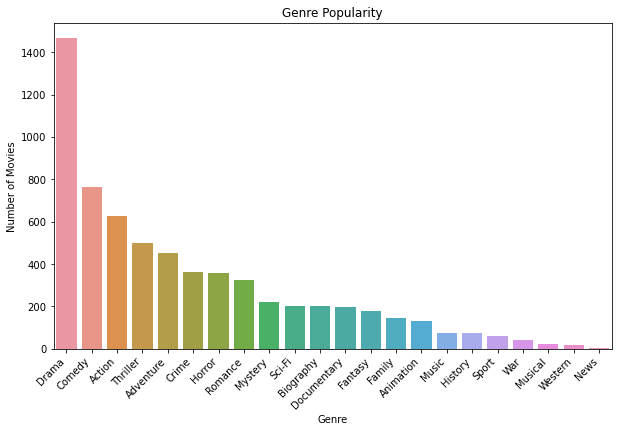

In [29]:
# Visualizing popular genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Popularity')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

Comment: We find that Drama genre is the most popular genre. We recommend that we focus on category.

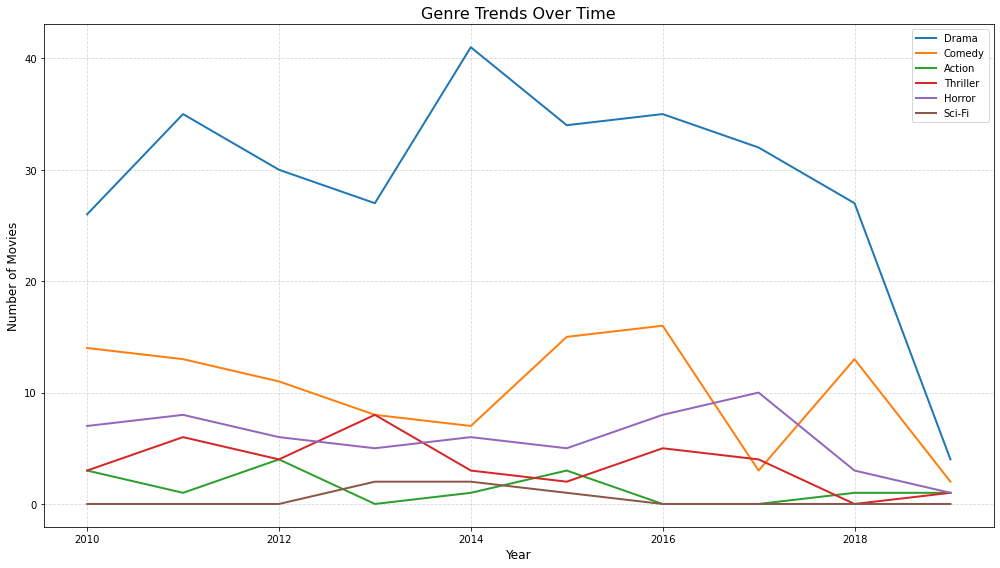

In [30]:
# Visualizing the trend of genres over time.
genres_to_analyze = ['Drama', 'Comedy', 'Action', 'Thriller', 'Horror', 'Sci-Fi'] # Expanded genres for analysis

genre_trends = movie_data[movie_data['genres'].str.contains('|'.join(genres_to_analyze))]
genre_trends = genre_trends.groupby(['start_year', 'genres'])['movie_id'].count().unstack(fill_value=0).reset_index()


plt.figure(figsize=(14, 8)) # Increased figure size
for genre in genres_to_analyze:
    plt.plot(genre_trends['start_year'], genre_trends[genre], label=genre, linewidth=2)
    
plt.title('Genre Trends Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.legend(fontsize=10) # Adjusted legend font size
plt.grid(True, linestyle='--', alpha=0.5) # Added grid for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Comment: The drama genre has drastically been droping in popularity from the year 2016

## Understanding the relationship between production budget and revenue

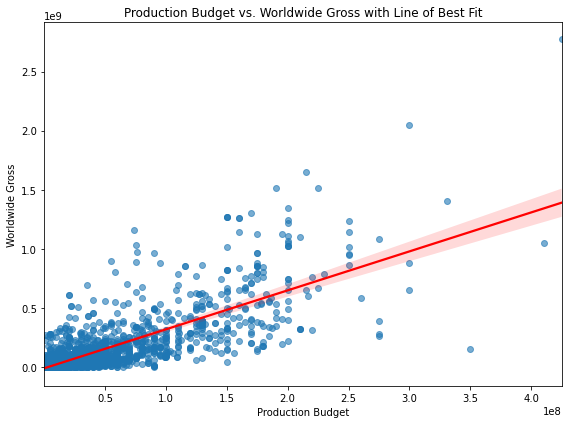

In [31]:
# Visualizing the relationship
plt.figure(figsize=(8, 6))
sns.regplot(x='production_budget', y='worldwide_gross', data=movie_data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Production Budget vs. Worldwide Gross with Line of Best Fit')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.tight_layout()
plt.show()

In [32]:
correlation = movie_data['production_budget'].corr(movie_data['worldwide_gross'])
print(f"Correlation between Production Budget and Worldwide Gross: {correlation}")

Correlation between Production Budget and Worldwide Gross: 0.784305736836933


Comment: There is a high positive correlation between production budget and revenue. With an increase in production budget, we expect a corresponding increase in revenue.

## Determining the optimal budget for producing films in different genres to ensure a high ROI (Return on Investment)

In [33]:
movie_data['roi_percentage'] = (movie_data['worldwide_gross'] - movie_data['production_budget']) / movie_data['production_budget']*100
mean_roi_percentage = movie_data.groupby('genres')['roi_percentage'].mean()
print(mean_roi_percentage)

genres
Action                        129.334800
Action,Adventure              -59.318356
Action,Adventure,Animation    297.995343
Action,Adventure,Biography    136.653044
Action,Adventure,Comedy       290.166911
                                 ...    
Sci-Fi,Thriller                -8.485535
Sport                         -69.760511
Thriller                      377.966464
War                           -24.502237
Western                      -100.000000
Name: roi_percentage, Length: 308, dtype: float64


In [34]:
positive_roi = movie_data[movie_data['roi_percentage'] > 0][['genres', 'production_budget', 'roi_percentage']]
sorted_positive_roi = positive_roi.sort_values(by='roi_percentage', ascending=False)
sorted_positive_roi

,genres,production_budget,roi_percentage
1946,"Horror,Mystery,Thriller",100000,41556.474000
2174,"Biography,Documentary",858000,31135.431235
2390,Horror,114000,26292.161404
2302,"Action,Comedy,Drama",1000000,22400.000000
782,"Horror,Thriller",325000,21438.461538
...,...,...,...
1896,"Drama,Romance",450000,0.077556
1897,"Crime,Drama",450000,0.077556
87,Drama,2000000,0.056200
165,Documentary,180000000,0.026547


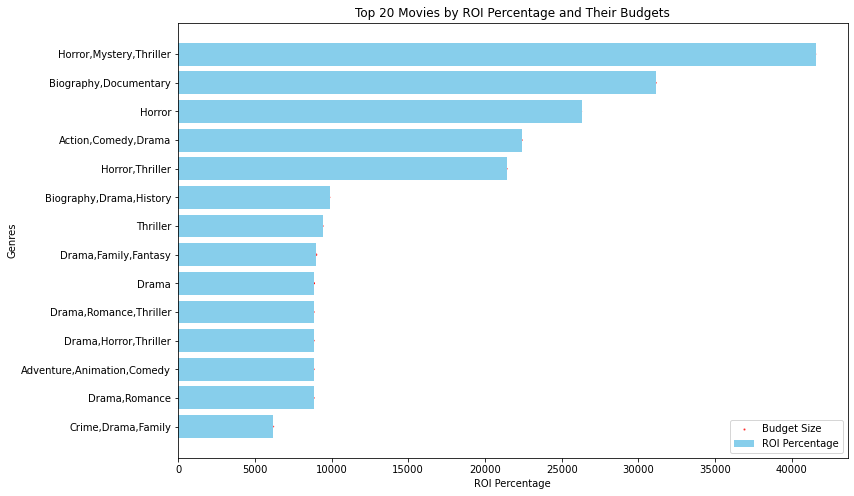

In [35]:
top_20_movies = movie_data.sort_values(by='roi_percentage', ascending=False).head(20)

# Plot the top 20 movies
plt.figure(figsize=(12, 8))
plt.barh(top_20_movies['genres'], top_20_movies['roi_percentage'], color='skyblue', label='ROI Percentage')
plt.scatter(top_20_movies['roi_percentage'], top_20_movies['genres'], 
            s=top_20_movies['production_budget'] / 1000000, color='red', alpha=0.6, label='Budget Size')

plt.xlabel('ROI Percentage')
plt.ylabel('Genres')
plt.title('Top 20 Movies by ROI Percentage and Their Budgets')
plt.legend(loc='lower right')
plt.gca().invert_yaxis()  
plt.show()

Comment: Horror, Mystery, Thriller genre has the most optimal budget generating the highest ROI

## Identifying the seasonal trends in the box office

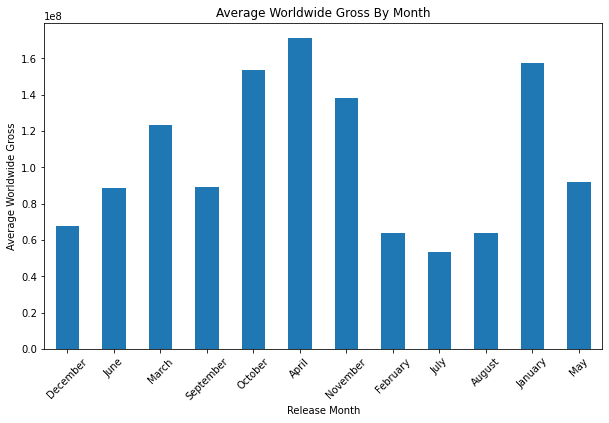

In [36]:
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'], errors='coerce')

movie_data['release_month'] = movie_data['release_date'].dt.month

month_names = movie_data['release_month'].apply(lambda x: pd.to_datetime(f'2020-{x}-01').strftime('%B'))

monthly_gross = movie_data.groupby('release_month')['worldwide_gross'].mean()

plt.figure(figsize=(10, 6))

monthly_gross.plot(kind='bar')
plt.xticks(ticks=range(12), labels=month_names.unique(), rotation=45)
plt.xlabel('Release Month')
plt.ylabel('Average Worldwide Gross')
plt.title('Average Worldwide Gross By Month')
plt.show()

Comment: April is the best month followed by January and October in terms of worldwide gross revenue from movies.

## Statistical Analysis  

### Hypothesis testing

In [37]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

action_movies = movie_data[movie_data['genres'].str.contains('Action')]
comedy_movies = movie_data[movie_data['genres'].str.contains('Comedy')]


t_statistic, p_value = stats.ttest_ind(action_movies['worldwide_gross'], comedy_movies['worldwide_gross'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in worldwide gross between action and comedy movies.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in worldwide gross between action and comedy movies.")

T-statistic: 6.848105100345324
P-value: 1.1210636695086836e-11
Reject the null hypothesis. There is a statistically significant difference in worldwide gross between action and comedy movies.


In [38]:
correlation_coefficient, p_value = stats.pearsonr(movie_data['production_budget'], movie_data['averagerating'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There's a statistically significant correlation between production budget and average rating.")
else:
    print("Fail to reject the null hypothesis. There's no statistically significant correlation between production budget and average rating.")

Correlation coefficient: 0.1392041926561125
P-value: 1.2320862050710343e-13
Reject the null hypothesis. There's a statistically significant correlation between production budget and average rating.


### Linear regression 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data for prediction (example using production budget as predictor)
features = ['production_budget']  # You can add more features here
target = 'worldwide_gross'
X = movie_data[features]
y = movie_data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

rmse

127680312.09812376

In [41]:
new_movie_budgets = [[200000000], [50000000], [10000000]] # Example budgets
predicted_gross = model.predict(new_movie_budgets)
print(f"Predicted Worldwide Gross: {predicted_gross}")

Predicted Worldwide Gross: [6.35902285e+08 1.53833110e+08 2.52813303e+07]


## **Recommendation** 



1. **Focus on Popular Genres:**
    - The analysis shows that the Drama genre is the most popular. However, its popularity has been declining since 2016.
    - Genres Comedy, Action, Thriller, Horror, and Sci-Fi have shown consistent performance. It is recommended that new movie productions focus on 
these genres
2. **Optimal Budget Allocation:**
    - There is a high positive correlation between production budget and worldwide gross revenue. Increasing the production budget can lead to higher revenue.
    - a lower production budget can still yield a high ROI for genres like Horror, Mystery, and Thriller. It is recommended to allocate budgets efficiently based on the genre to maximize ROI.

3. **Seasonal Trends:**
    - The analysis indicates that April, January, and October are the best months for movie releases in terms of worldwide gross revenue.
    - It is recommended to plan major movie releases during these months to capitalize on higher audience engagement and revenue potential.

4. **Production Budget and ROI:**
    - Movies with lower production budgets in the **Horror, Mystery, and Thriller** genres tend to have higher ROI. Focus on producing high-quality films in these genres with controlled budgets to ensure profitability.

5. **Leverage High ROI Genres:**
   - Genres like Horror, Mystery, and Thriller have shown the highest ROI. Investing in these genres can provide significant returns with relatively lower risk.
   - Consider producing more films in these genres to maximize profitability

6. **Genre-Specific Strategies:**
   - Action vs. Comedy Revenue: Hypothesis testing indicates no statistically significant difference in worldwide gross between action and 
comedy movies. This suggests that both genres can be equally profitable, and the studio should consider producing a balanced mix of action 
and comedy films.
  - Action vs. Comedy Ratings: There is no statistically significant difference in average ratings between action and comedy movies. This implies that both genres are equally well-received by audiences, and the studio can confidently invest in either genre without worrying about 
audience reception

7. **Production Budget and Ratings:**
  - The correlation analysis shows no statistically significant correlation between production budget and average rating. This suggests that 
increasing the production budget does not necessarily lead to higher audience ratings. The studio should focus on other factors such as script 
quality, casting, and marketing to improve movie ratings.

8. **Predictive Modeling for Revenue:**
   - The linear regression model predicts worldwide gross revenue based on production budget. The model 
can be used to estimate the potential revenue for new movie projects with different budget levels. For 
example, a movie with a 200 million budget is predicted to generate approximately 635.9 million in 
worldwide gross revenue.

   - The studio can use this predictive model to set realistic revenue expectations and make informed 
decisions about budget allocation for future projects.

